In [1]:
!pip3 install -q gdown
!gdown https://drive.google.com/uc?id=11oDZ6JvJS0xP_u_YE55IFoX1C8TzDKQB

Downloading...
From: https://drive.google.com/uc?id=11oDZ6JvJS0xP_u_YE55IFoX1C8TzDKQB
To: /Users/andrew_borovets/Desktop/PROGA/MIPT/course3/Statistics/Statistics/train.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 461k/461k [00:00<00:00, 3.28MB/s]


In [2]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.4, style='whitegrid')
%config InlineBackend.figure_format='retina'

–í —É—á–µ–±–Ω—ã—Ö —Ü–µ–ª—è—Ö –≤ –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–µ –∑–∞–ø—Ä–µ—â–µ–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–æ—Ç–æ–≤—ã–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏–∑ –ø–∞–∫–µ—Ç–∞ *scikit-learn*).

## –ó–∞–¥–∞—á–∞ 1 (10 –±–∞–ª–ª–æ–≤)

–ù–∞ –ø–æ–ª–∏–≥–æ–Ω–µ –∏—Å–ø—ã—Ç—ã–≤–∞–µ—Ç—Å—è –Ω–æ–≤–∞—è –º–æ–¥–µ–ª—å —Ç—Ä–∞–º–≤–∞—è. –í –æ–¥–Ω–æ–º –∏–∑ –∏—Å–ø—ã—Ç–∞–Ω–∏–∏ —Ä–∞–±–æ—Ç—ã –¥–≤–∏–≥–∞—Ç–µ–ª—è –ø—Ä–æ–≤–µ—Ä—è–µ—Ç—Å—è, —á—Ç–æ –¥–≤–∏–∂–µ–Ω–∏–µ —Ç—Ä–∞–º–≤–∞—è —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ. –î–ª—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ –Ω–∞ —Ç—Ä–∞–º–≤–∞–π —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –¥–∞—Ç—á–∏–∫, –ø–æ—Å–µ–∫—É–Ω–¥–Ω–æ –∏–∑–º–µ—Ä—è—é—â–∏–π –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ. 

–ó–∞–ø–∏—Å–∏ –¥–∞—Ç—á–∏–∫–∞ –º–æ–∂–Ω–æ –æ–ø–∏—Å–∞—Ç—å —Ç–∞–∫–æ–π –º–æ–¥–µ–ª—å—é:

 $$X_i = \beta_1+i\beta_2+\varepsilon_0+\ldots+\varepsilon_i,\, i= 0, 1, \ldots, n$$ 
 
–≥–¥–µ $X_i$ --- —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–æ–µ—Ö–∞–ª —Ç—Ä–∞–º–≤–∞–π –∑–∞ $i$ —Å–µ–∫—É–Ω–¥. –í –º–æ–¥–µ–ª–∏ $\beta_1$ --- –Ω–∞—á–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ, $\beta_2$ --- —Å–∫–æ—Ä–æ—Å—Ç—å —Ç—Ä–∞–º–≤–∞—è, $\varepsilon_0$ --- –æ—à–∏–±–∫–∞ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –ø–æ–∫–∞–∑–∞–Ω–∏—è –¥–∞—Ç—á–∏–∫–∞. –û—Ç—Å—á–µ—Ç –≤—Ä–µ–º–µ–Ω–∏ –∏–¥–µ—Ç –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–∞–º–µ—Ä–∞, –ø—Ä–∏—á–µ–º –æ—Ç—Å—á–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å –æ—à–∏–±–∫–æ–π. –î–ª—è $i = 1, \ldots, n$ –≤–µ–ª–∏—á–∏–Ω–∞ $\varepsilon_i$ –µ—Å—Ç—å –æ—à–∏–±–∫–∞ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è, —Ç–æ –µ—Å—Ç—å $\varepsilon_i = \varepsilon_i^t \beta_2,$ –≥–¥–µ $\varepsilon_i^t$ --- –æ—à–∏–±–∫–∞ –æ—Ç—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏. –í—Å–µ –æ—à–∏–±–∫–∏ $\varepsilon_i$ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ –∑–∞–∫–æ–Ω—É $N(0, \sigma^2)$. 

–°–≤–µ–¥–∏—Ç–µ –∑–∞–¥–∞—á—É –∫ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –∏ –Ω–∞–π–¥–∏—Ç–µ –æ—Ü–µ–Ω–∫–∏ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –¥–ª—è –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è $\beta_1$ –∏ —Å–∫–æ—Ä–æ—Å—Ç–∏ $\beta_2,$ –∞ —Ç–∞–∫–∂–µ –Ω–µ—Å–º–µ—â–µ–Ω–Ω—É—é –æ—Ü–µ–Ω–∫—É –¥–ª—è $\sigma^2,$ –∏–∑ –∫–æ—Ç–æ—Ä–æ–π –≤—ã—Ä–∞–∑–∏—Ç–µ –æ—Ü–µ–Ω–∫—É –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—Ç—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏. 

–î–∞–Ω–Ω—ã–µ –≤–æ–∑—å–º–∏—Ç–µ –∏–∑ —Ñ–∞–π–ª–∞ Regression.csv. –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.

### –†–µ—à–µ–Ω–∏–µ

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞—Ç–∞—Å–µ—Ç, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –ø–æ–∫–∞–∑–∞–Ω–∏—è –¥–∞—Ç—á–∏–∫–∞.

In [3]:
!pip3 install -q gdown
!gdown https://drive.google.com/uc?id=1gmSof1yxWt009QoBiKjwkLMlcpn3r61W

Downloading...
From: https://drive.google.com/uc?id=1gmSof1yxWt009QoBiKjwkLMlcpn3r61W
To: /Users/andrew_borovets/Desktop/PROGA/MIPT/course3/Statistics/Statistics/regression.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.98k/9.98k [00:00<00:00, 11.5MB/s]


In [25]:
X = np.genfromtxt('regression.csv')
print('–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:', X.shape)
print('–°—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å:', X[-1] / X.shape[0])

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (1000,)
–°—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å: 12.0408175


–î–∞—Ç–∞—Å–µ—Ç —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 1000 –∏–∑–º–µ—Ä–µ–Ω–∏–π. –ü–æ —Å–º—ã—Å–ª—É —Å—Ä–µ–¥–Ω—è—è —Å–∫–æ—Ä–æ—Å—Ç—å –∏–º–µ–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –º–µ—Ç—Ä—ã –≤ —Å–µ–∫—É–Ω–¥—É.

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑–∞–Ω–∏–π –¥–∞—Ç—á–∏–∫–∞:

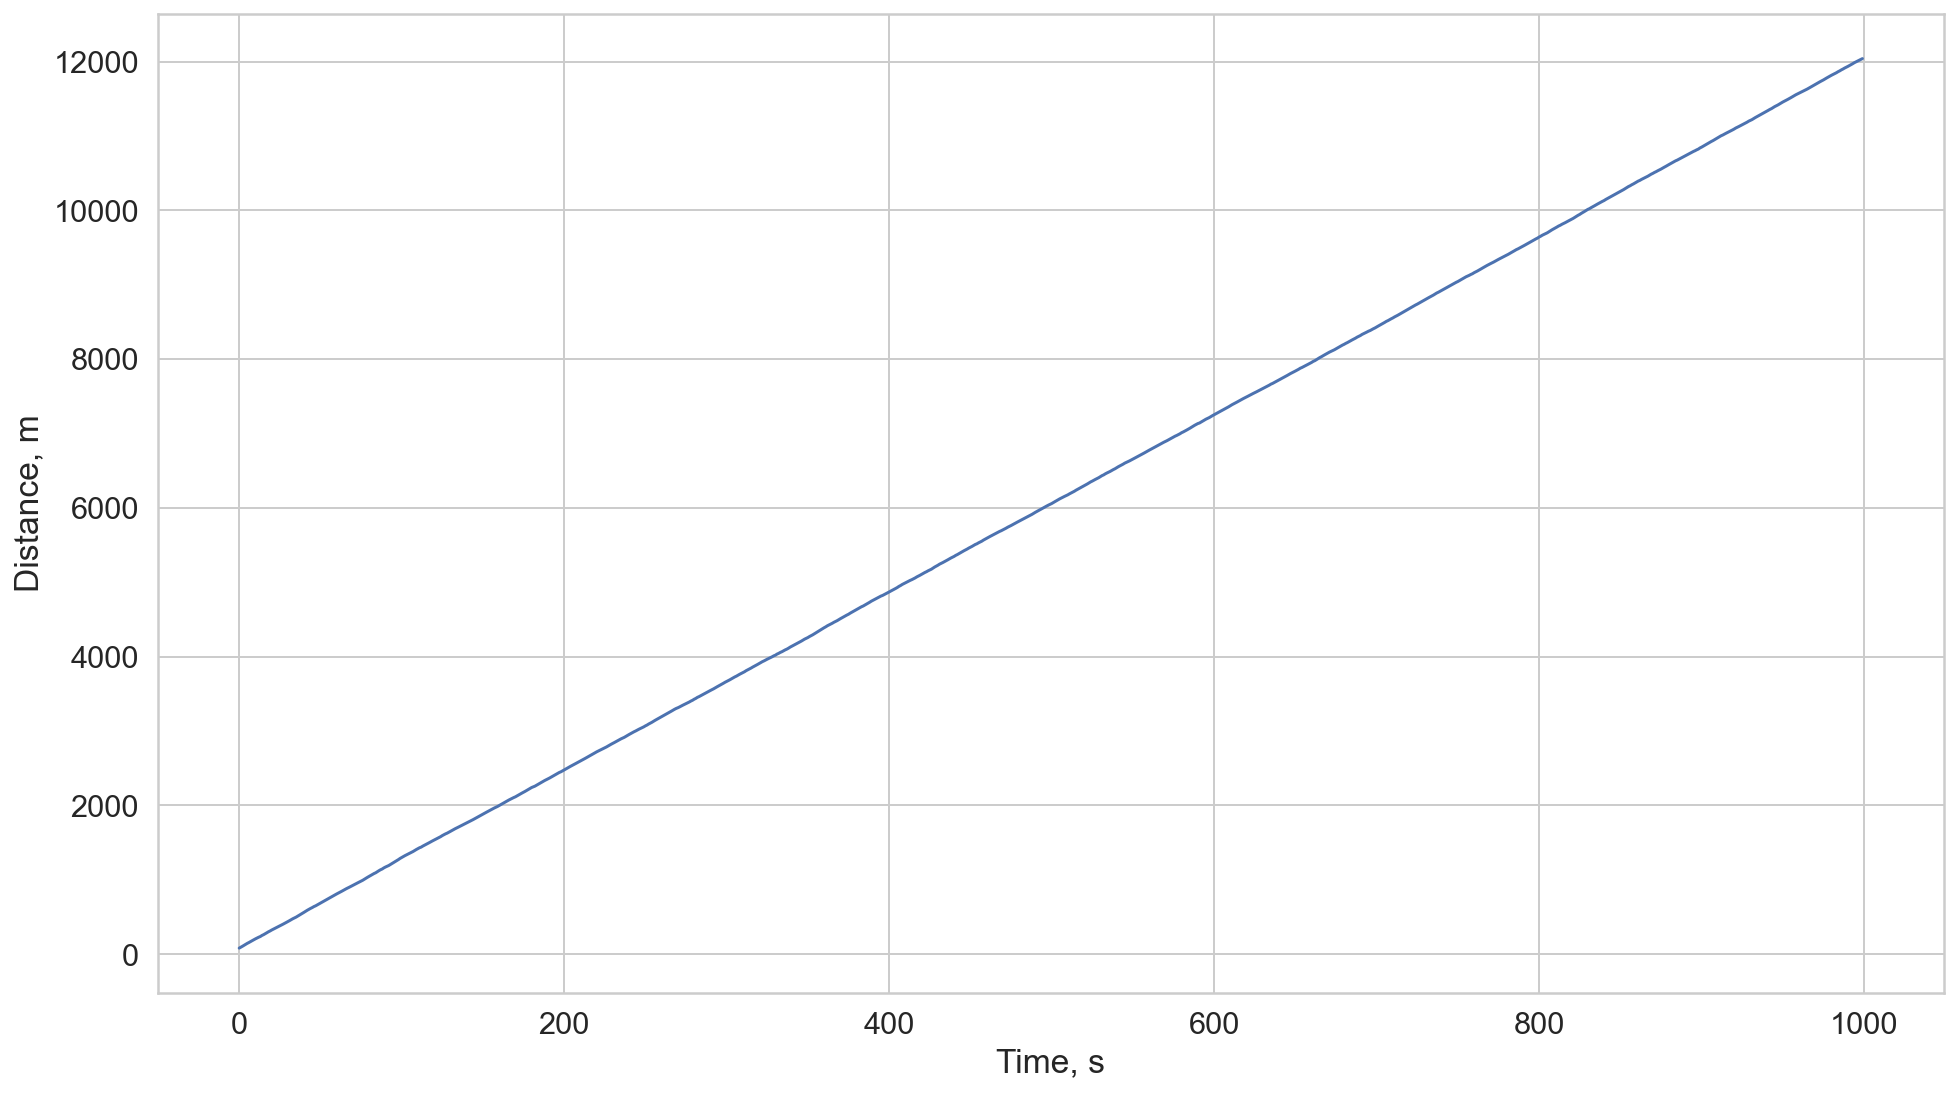

In [26]:
# YOUR CODE GOES HERE

plt.figure(figsize=(16, 9))

plt.plot(
    np.arange(X.shape[0]),
    X,
)

plt.xlabel('Time, s')
plt.ylabel('Distance, m')

plt.show()

–í–∏–¥–∏–º, —á—Ç–æ –≥—Ä–∞—Ñ–∏–∫ –ª–∏–Ω–µ–π–Ω—ã–π. –î–ª—è –æ—Ü–µ–Ω–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\beta_1$ –∏ $\beta_2$ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª—å—é. 

#### 1. –°–≤–µ–¥–µ–º –∑–∞–¥–∞—á—É –∫ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏

–ö–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —Å–≤–µ—Å—Ç–∏ –∏–∑–Ω–∞—á–∞–ª—å–Ω—É—é –∑–∞–¥–∞—á—É –∫ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏? –û—Å—Ç–∞–Ω–µ—Ç—Å—è –ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∞ –æ—à–∏–±–æ–∫ —Ç–µ–º –∂–µ? –ù–æ–≤—ã–π –≤–µ–∫—Ç–æ—Ä –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –Ω–∞–∑–æ–≤–∏—Ç–µ $Y$.

–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ, –∫–æ—Ç–æ—Ä–µ –ø—Ä–æ–µ—Ö–∞–ª —Ç—Ä–∞–º–≤–∞–π –∑–∞ $i$ —Å–µ–∫—É–Ω–¥ –ø–æ –ø–æ–∫–∞–∑–∞–Ω–∏—é –¥–∞—Ç—á–∏–∫–∞: 
$$X_i = \beta_1+i\beta_2+\varepsilon_0+\ldots+\varepsilon_i,\, i= 0, 1, \ldots, n,$$
–≥–¥–µ $\beta_1$ --- –Ω–∞—á–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ, $\beta_2$ --- —Å–∫–æ—Ä–æ—Å—Ç—å —Ç—Ä–∞–º–≤–∞—è, $\varepsilon_0$ --- –æ—à–∏–±–∫–∞ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –ø–æ–∫–∞–∑–∞–Ω–∏—è –¥–∞—Ç—á–∏–∫–∞.

–≠—Ç–∞ –∑–∞–¥–∞—á–∞ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –Ω–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –≤–µ–∫—Ç–æ—Ä –Ω–∞–±–ª—é–¥–µ–π–Ω–∏–π $X$ –∑–∞–¥–∞–Ω –≤ –¥—Ä—É–≥–æ–º –≤–∏–¥–µ, –Ω–æ –µ–µ –º–æ–∂–Ω–æ —Å–≤–µ—Å—Ç–∏ –∫ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º:
$$ Y = 
\left(\begin{array}{cc} 
X_0 \\
X_1 - X_0 \\
X_2 - X_1 \\
\dots \\
X_n - X_{n-1} \\
\end{array}\right) = 
\left(\begin{array}{cc} 
\beta_1 + \varepsilon_0 \\
\beta_2 + \varepsilon_1 \\
\beta_2 + \varepsilon_2 \\
\dots \\
\beta_2 + \varepsilon_n \\
\end{array}\right),
$$
–≥–¥–µ –≤–µ–∫—Ç–æ—Ä $Y$ --- —ç—Ç–æ –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü –Ω–∞–±–ª—é–¥–µ—Ü–Ω–∏–π.

–°—Ç–æ–ª–±–µ—Ü $Y$ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤ –≤–∏–¥–µ $Y = l + \varepsilon$, –≥–¥–µ $l$ --- —ç—Ç–æ –∏–∑–º–µ—Ä—è–µ–º–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ (—Å–æ—Å—Ç–æ–∏—Ç –∏–∑ $\beta_1$ –∏ $\beta_2$), –∞ $\varepsilon$ --- –æ—à–∏–±–∫–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è.

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –ø—Ä–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏ $X$ –≤ $Y$ –≤–µ–∫—Ç–æ—Ä –æ—à–∏–±–æ–∫ –æ—Å—Ç–∞–ª—Å—è –∏–∑ —Ç–æ–≥–æ –∂–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ –æ—à–∏–±–∫–∏ –∏–∑–º–µ—Ä–µ–Ω–∏–π –±—ã–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã: $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, –ø–æ—Å–ª–µ –≤—ã—á–µ—Ç–∞–Ω–∏—è, –ø–æ —Å–≤–æ–π—Å—Ç–≤–∞–º–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–ª—É—á–∏–º —Å–ª—É—á–∞–π–Ω—É—é –≤–µ–ª–∏—á–∏–Ω—É –∏–∑ —Ç–æ–≥–æ –∂–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $\varepsilon \sim \mathcal{N}(0, \sigma^2)$.

In [31]:
# YOUR CODE GOES HERE
n = len(X)
Y = X - np.array(np.append([0], X[:n-1]))

#### 2. –¢—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏

–ù–∞–ø–æ–º–Ω–∏–º, —á—Ç–æ –≤ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ -- –≤–µ–∫—Ç–æ—Ä $X \in \mathbb{R}^n$, –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–º–æ –≤ –≤–∏–¥–µ $X = l + \varepsilon$, –≥–¥–µ $l$ --- –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π —Å–ª—É—á–∞–π–Ω—ã–π –≤–µ–∫—Ç–æ—Ä (–∏–∑–º–µ—Ä—è–µ–º–∞—è –≤–µ–ª–∏—á–∏–Ω–∞), $\varepsilon$ --- —Å–ª—É—á–∞–π–Ω—ã–π –≤–µ–∫—Ç–æ—Ä (–æ—à–∏–±–∫–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è), –∏–º–µ—é—â–∏–π —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ $\mathcal{N}(\vec{0}, \sigma^2 I)$. –¢–æ –µ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –∏–∑–º–µ—Ä–µ–Ω–∏—è –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —Ä–∞–≤–Ω–æ –Ω—É–ª—é –∏ –≤ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –≤—Å–µ—Ö –∏–∑–º–µ—Ä–µ–Ω–∏–π –æ—à–∏–±–∫–∏ –¥–æ–ª–∂–Ω—ã –∏–º–µ—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é (–≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å).

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—à–∏–±–∫–∏ –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º

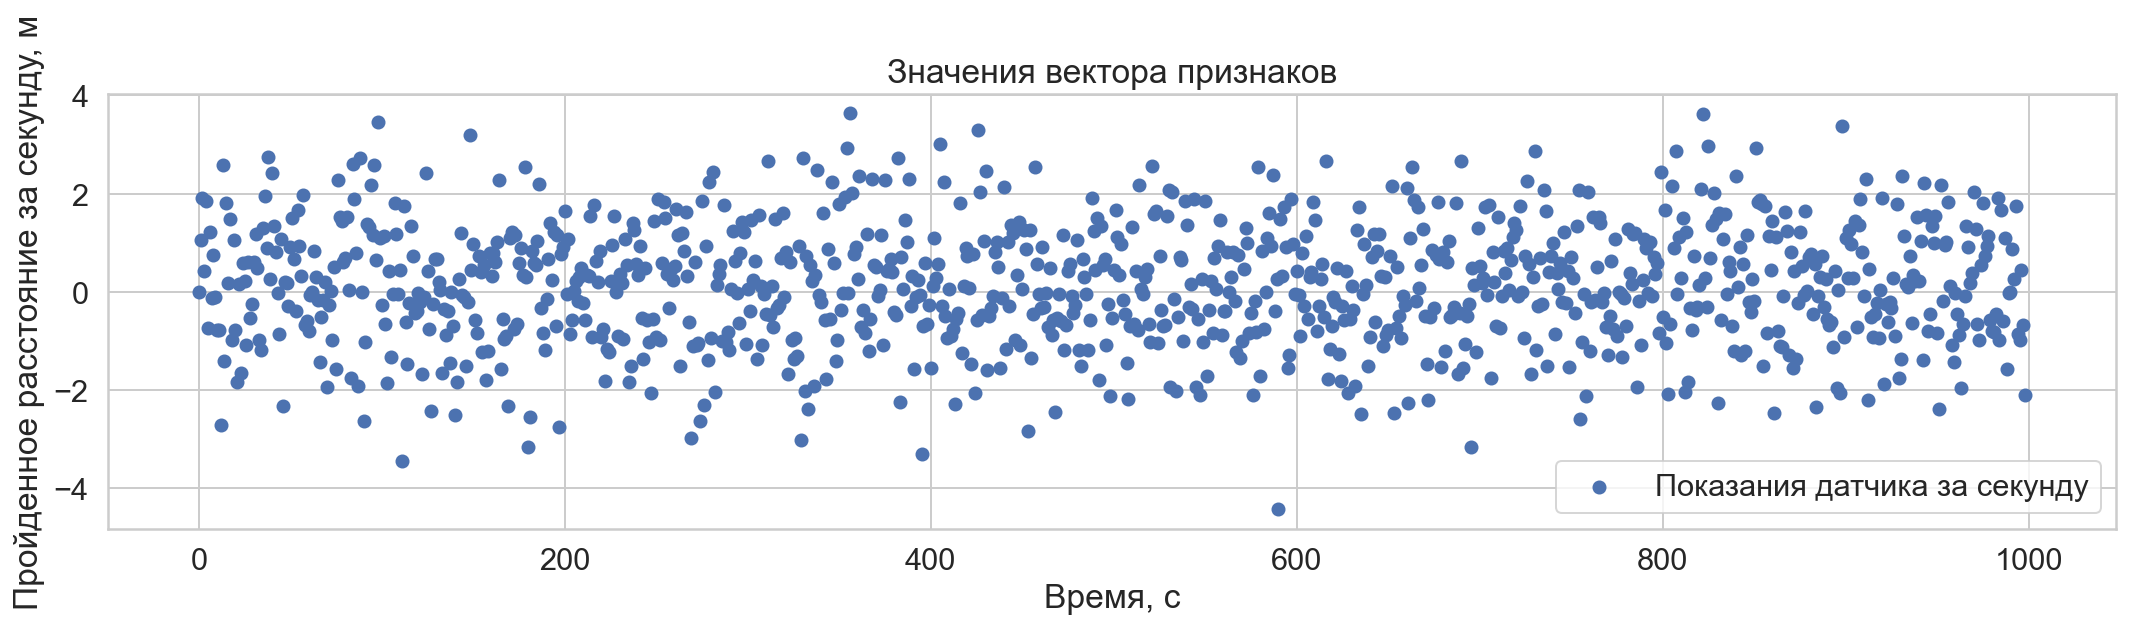

In [32]:
time = np.arange(Y.shape[0] - 1)
plt.figure(figsize=(18,4))
plt.title("–ó–Ω–∞—á–µ–Ω–∏—è –≤–µ–∫—Ç–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.scatter(time, Y[1:] - Y[1], label="–ü–æ–∫–∞–∑–∞–Ω–∏—è –¥–∞—Ç—á–∏–∫–∞ –∑–∞ —Å–µ–∫—É–Ω–¥—É")
plt.xlabel("–í—Ä–µ–º—è, —Å")
plt.ylabel("–ü—Ä–æ–π–¥–µ–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –∑–∞ —Å–µ–∫—É–Ω–¥—É, –º")
plt.legend()

plt.show()

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –æ—à–∏–±–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –î–ª—è —ç—Ç–æ–≥–æ —Å—Ä–∞–≤–Ω–∏–º —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –æ—à–∏–±–æ–∫ –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ —Å –ø–æ–º–æ—â–±—é –≥—Ä–∞—Ñ–∏–∫–∞ QQ-plot:

<ipython-input-44-1337a2e71cbd>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


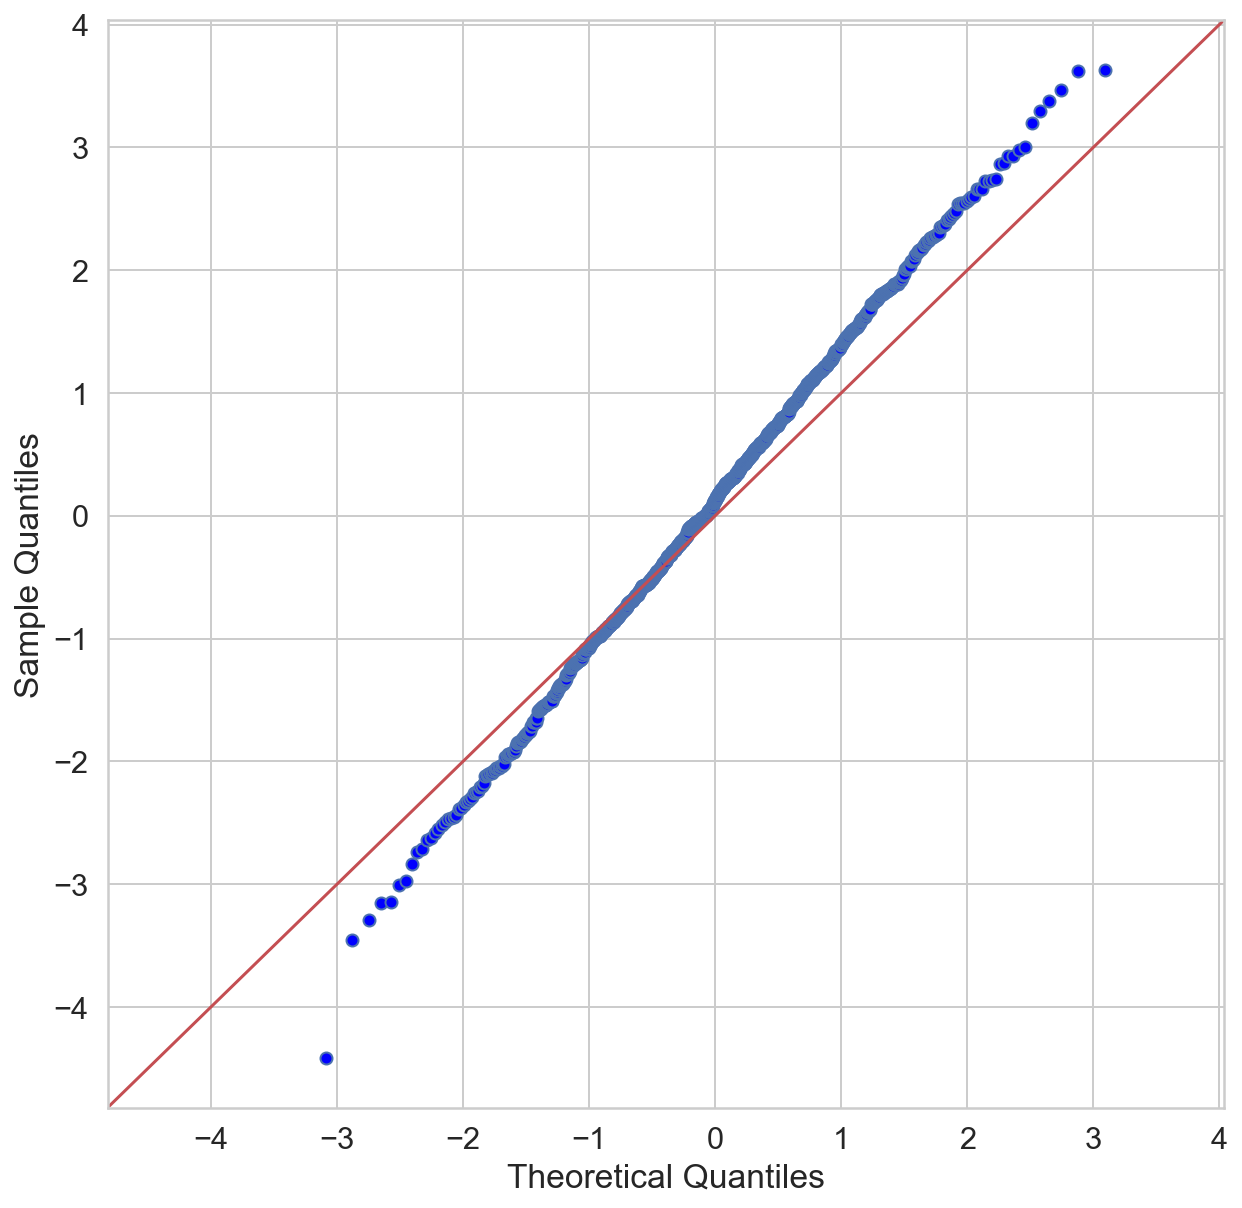

In [44]:
# YOUR CODE GOES HERE
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(Y[1:] - Y[1], line='45', ax=ax)
fig.show()

–í—ã–≤–æ–¥

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ Y –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

#### 3. –û—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

–í–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–º –≤ –Ω–∞—á–∞–ª–µ –∑–∞–¥–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–º `LinearModel`. –ö–∞–∫ –≤—ã–≥–ª—è–¥–∏—Ç –≤–∞—à–∞ –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ $Z$? –ö–∞–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\beta_1$ –∏ $\beta_2$?

–í–µ–∫—Ç–æ—Ä $l$ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤ –≤–∏–¥–µ: $l = Z\theta$, –≥–¥–µ $\theta$ --- —ç—Ç–æ –≤–µ–∫—Ç–æ—Ä –∏—Å–∫–æ–º—ã—Ö –≤–µ—Å–æ–≤: 
$\theta = 
\left(\begin{array}{cc} 
\beta_1 \\
\beta_2 \\
\end{array}\right)$, –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ $Z = 
\left(\begin{array}{cc} 
1 & 0 \\
0 & 1 \\
\dots & \dots\\
0 & 1 \\
\end{array}\right)$ –∏–º–µ–µ—Ç –≤—ã—Å–æ—Ç—É $n$.

–õ–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å —Ç–∞–∫: $Y = Z\theta + \varepsilon$.

–û—Ü–µ–Ω–∫–∞ $\theta$ –º–µ—Ç–æ–¥–æ–º –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤: $$\hat{\theta} = \arg \min_\theta || Y - Z\theta ||^2.$$ –î–ª—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ: 

$$\hat{\theta} = (Z^TZ)^{-1}Z^TY.$$

In [48]:
Z = np.array([1, 0] + [0, 1] * (Y.shape[0] - 1))
Z = Z.reshape((Y.shape[0], 2))

In [51]:
# YOUR CODE GOES HERE
thetta = np.linalg.inv(Z.T @ Z) @ Z.T @ Y
thetta

array([82.0053    , 11.97078298])

–ò—Ç–æ–≥–æ, –ø–æ–ª—É—á–∞–µ–º,  –∑–Ω–∞—á–µ–Ω–∏—è $\beta_1$ –∏ $\beta_2$ -- –Ω–∞—á–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –∏ —Å–∫–æ—Ä–æ—Å—Ç—å: $\beta_1 = 82 (–º), \beta_2 = 12 (–º/—Å)$.

#### 4. –û—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—à–∏–±–∫–∏ –ø–æ–∫–∞–∑–∞–Ω–∏–π –¥–∞—Ç—á–∏–∫–∞.

–ù–∞–π–¥–∏—Ç–µ –æ—Ü–µ–Ω–∫—É –¥–∏—Å–ø–µ—Ä—Å–∏–∏ $\sigma^2$ –ø–æ–∫–∞–∑–∞–Ω–∏–π –¥–∞—Ç—á–∏–∫–∞ $\varepsilon$. –ü–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ –æ–Ω–∞ –Ω–∞–π–¥–µ–Ω–∞, –Ω–∞–π–¥–∏—Ç–µ –æ—Ü–µ–Ω–∫—É –¥–∏—Å–ø–µ—Ä—Å–∏–∏ $\sigma^2$ –æ—à–∏–±–∫–∏ –æ—Ç—Å—á—ë—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ $\varepsilon^t$.

–°—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ—Å–º–µ—â–µ–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ $\sigma^2$:
$$\dfrac{1}{n-k}||Y - Z\hat{\theta}||_2^2,$$ –≥–¥–µ $n$ --- —á–∏—Å–ª–æ –∏–∑–º–µ—Ä–µ–Ω–∏–π, $k$ --- —Ä–∞–∑–º–µ—Ä –≤–µ–∫—Ç–æ—Ä–∞ –≤–µ—Å–æ–≤. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ $n = 1000$ (—Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏), $k = 2$ (—á–∏—Å–ª–æ –≤–µ—Å–æ–≤: $\beta_1$ –∏ $\beta_2$).

In [52]:
n = 1000
k = 2

sigma_hat = 1 / (n - k) * np.linalg.norm(Y - Z @ thetta) ** 2# YOUR CODE GOES HERE
print("–ù–µ—Å–º–µ—â—ë–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏:", sigma_hat)

–ù–µ—Å–º–µ—â—ë–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏: 1.5252448716139118


–ù–∞–π–¥—ë–º –æ—Ü–µ–Ω–∫—É –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—à–∏–±–∫–∏ –æ—Ç—Å—á—ë—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ $\varepsilon_i^t.$ –î–æ —ç—Ç–æ–≥–æ –Ω–∞—à–ª–∏ $\varepsilon$ --- –æ—à–∏–±–∫–∞ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. –û—à–∏–±–∫–∞ –æ—Ç—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ —Å–≤—è–∑–∞–Ω–∞ —Å –æ—à–∏–±–∫–æ–π –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è —Ç–∞–∫: $\varepsilon = \varepsilon^t \beta_2,$ –≥–¥–µ $\varepsilon^t$ --- –æ—à–∏–±–∫–∞ –æ—Ç—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏.

–†–∞–∑ $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, —Ç–æ $\varepsilon^t = \varepsilon/\beta_2 \sim \mathcal{N}\left(0, \dfrac{\sigma^2}{\beta_2 ^ 2}\right)$

In [55]:

print("–û—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—à–∏–±–∫–∏ –æ—Ç—Å—á—ë—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏", sigma_hat / thetta[-1]**2)

–û—Ü–µ–Ω–∫–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—à–∏–±–∫–∏ –æ—Ç—Å—á—ë—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ 0.010643744924922071


#### 5. –ò–∑–º–µ—Ä–∏–º –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏

–í –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏, —ç–∫—Å–ø–µ—Ä—Ç—ã –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å [–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞–Ω—Ü–∏–∏](https://ru.wikipedia.org/wiki/–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç_–¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏). –û–Ω –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∫–∞–∫—É—é –¥–æ–ª—é –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≤—ã–±–æ—Ä–∫–∏ –æ–±—ä—è—Å–Ω—è–µ—Ç –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ, –∑–Ω–∞—á–µ–Ω–∏–µ $R^2 > 0.98$ –±—É–¥–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ —Ç—Ä–∞–º–≤–∞–π –ø—Ä–æ—à–µ–ª –∏—Å–ø—ã—Ç–∞–Ω–∏–µ.

In [73]:
time = np.arange(X.shape[0]) + 1

# YOUR CODE GOES HERE

res = np.array([thetta[0] + thetta[1] * time - X])
X_mean = np.mean(X)
SS_tot = np.sum((X - X_mean)**2)
SS_res = np.sum(res**2)
Y_mean = np.mean(Y)
sigma = np.sum((Y - Y_mean)**2)
R = 1 - SS_res / SS_tot

print("R^2 = ", R)

R^2 =  0.9999680124927224


–û—Ç–≤–µ—Ç –≤ –∑–∞–¥–∞—á–µ:

$\beta_1 = 82.0053$ -- –Ω–∞—á–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ,

$\beta_2 = 11.9708$ -- —Å–∫–æ—Ä–æ—Å—Ç—å –¥–≤–∏–∂–µ–Ω–∏—è,

$\sigma^2 = 1.5252$ -- –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—Ç—Å—á–µ—Ç–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è,

$\sigma_t^2 = 0.0106$ -- –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—Ç—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏.

### –í—ã–≤–æ–¥

–ú—ã –æ—Ü–µ–Ω–∏–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã $\beta_1, \beta_2$, —Å–≤–µ–¥—è –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—É—é –∑–∞–¥–∞—á—É –∫ –∑–∞–¥–∞—á–µ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –Ω–∞—à–ª–∏ –Ω–µ—Å–º–µ—â–µ–Ω–Ω—É—é –æ—Ü–µ–Ω–∫—É –¥–∏—Å–ø–µ—Ä—Å–∏–∏ $\hat{\sigma}^2$ –∏ —É–±–µ–¥–∏–ª–∏—Å—å, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–æ–µ.

## –ó–∞–¥–∞—á–∞ 2 (20 –±–∞–ª–ª–æ–≤)

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–∞–∫—Ç–∏–∫—É–µ–º—Å—è –≤ —Ä–µ—à–µ–Ω–∏–∏ –∑–∞–¥–∞—á –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ú—ã –±—É–¥–µ–º –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä—ã–Ω–æ–∫ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ üèò. –î–∞–Ω–Ω—ã–µ –≤–æ–∑—å–º–µ–º –∏–∑ [—Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ kaggle. –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–π –Ω–∞—Å –±—É–¥—É—Ç –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö, –∞ –Ω–µ –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png).

–í —á–∞—Å—Ç–Ω–æ—Å—Ç–∏ –º—ã –±—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –≤–ª–∏—è–Ω–∏–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –¥–æ–º–∞ –∏ –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –≥–∏–ø–æ—Ç–µ–∑.

In [74]:
from scipy import stats as sps

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [75]:
df = pd.read_csv("train.csv")

df.fillna("NA", inplace=True)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.0     8450   Pave    NA      Reg   
1   2          20       RL        80.0     9600   Pave    NA      Reg   
2   3          60       RL        68.0    11250   Pave    NA      IR1   
3   4          70       RL        60.0     9550   Pave    NA      IR1   
4   5          60       RL        84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏ —ç—Ç–æ–º –Ω–µ –ª–∏—à–µ–Ω—ã –ø–æ—Ä—è–¥–∫–∞. –î–∞–≤–∞–π—Ç–µ –∑–∞–º–µ–Ω–∏–º —Å—Ç—Ä–æ–∫–∏ –Ω–∞ —á–∏—Å–ª–∞, —Å–æ—Ö—Ä–∞–Ω–∏–≤ –ø—Ä–∏ —ç—Ç–æ–º –ø–æ—Ä—è–¥–æ–∫.

In [76]:
useful_columns = [
    "OverallQual", 
    "GrLivArea", 
    "ExterQual",
    "KitchenQual",
    "GarageArea",
    "PoolArea",
    "BsmtQual",
    "TotalBsmtSF",
    "GarageFinish",
    "SalePrice"
]

filtered_df = df[useful_columns]

transforms = {
    "BsmtQual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "ExterQual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "GarageFinish": {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3},
}

for column_name, transform in transforms.items():
    filtered_df[column_name] = filtered_df[column_name].apply(lambda x: transform[x])


<ipython-input-76-455bb899d80c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column_name] = filtered_df[column_name].apply(lambda x: transform[x])


### –ò–∑—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–ü–µ—Ä–µ–¥ —Ç–µ–º, –∫–∞–∫ –Ω–∞—á–∞—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–∏–Ω–µ–π–Ω—ã–µ –º–æ–¥–µ–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–±–µ–¥–∏—Ç—å—Å—è –≤ —Ç–æ–º, —á—Ç–æ —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ —Å–ª–∏—à–∫–æ–º –∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω—ã. –î–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ü–∏—Ä—Å–æ–Ω–∞. –ò—Å–ø–æ–ª—å–∑—É—è ``sns.heatmap`` –ø–æ—Å—Ç—Ä–æ–π—Ç–µ "—Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É" –ø–æ–ø–∞—Ä–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —É–≤–∏–¥–µ—Ç—å —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ ``annot=True``. –°–¥–µ–ª–∞–π—Ç–µ —Ä–∞–∑–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–∞ –∞–ª–µ–∫–≤–∞—Ç–Ω—ã–º, –Ω–∞–ø—Ä–∏–º–µ—Ä, ``figsize=(11, 10)``.

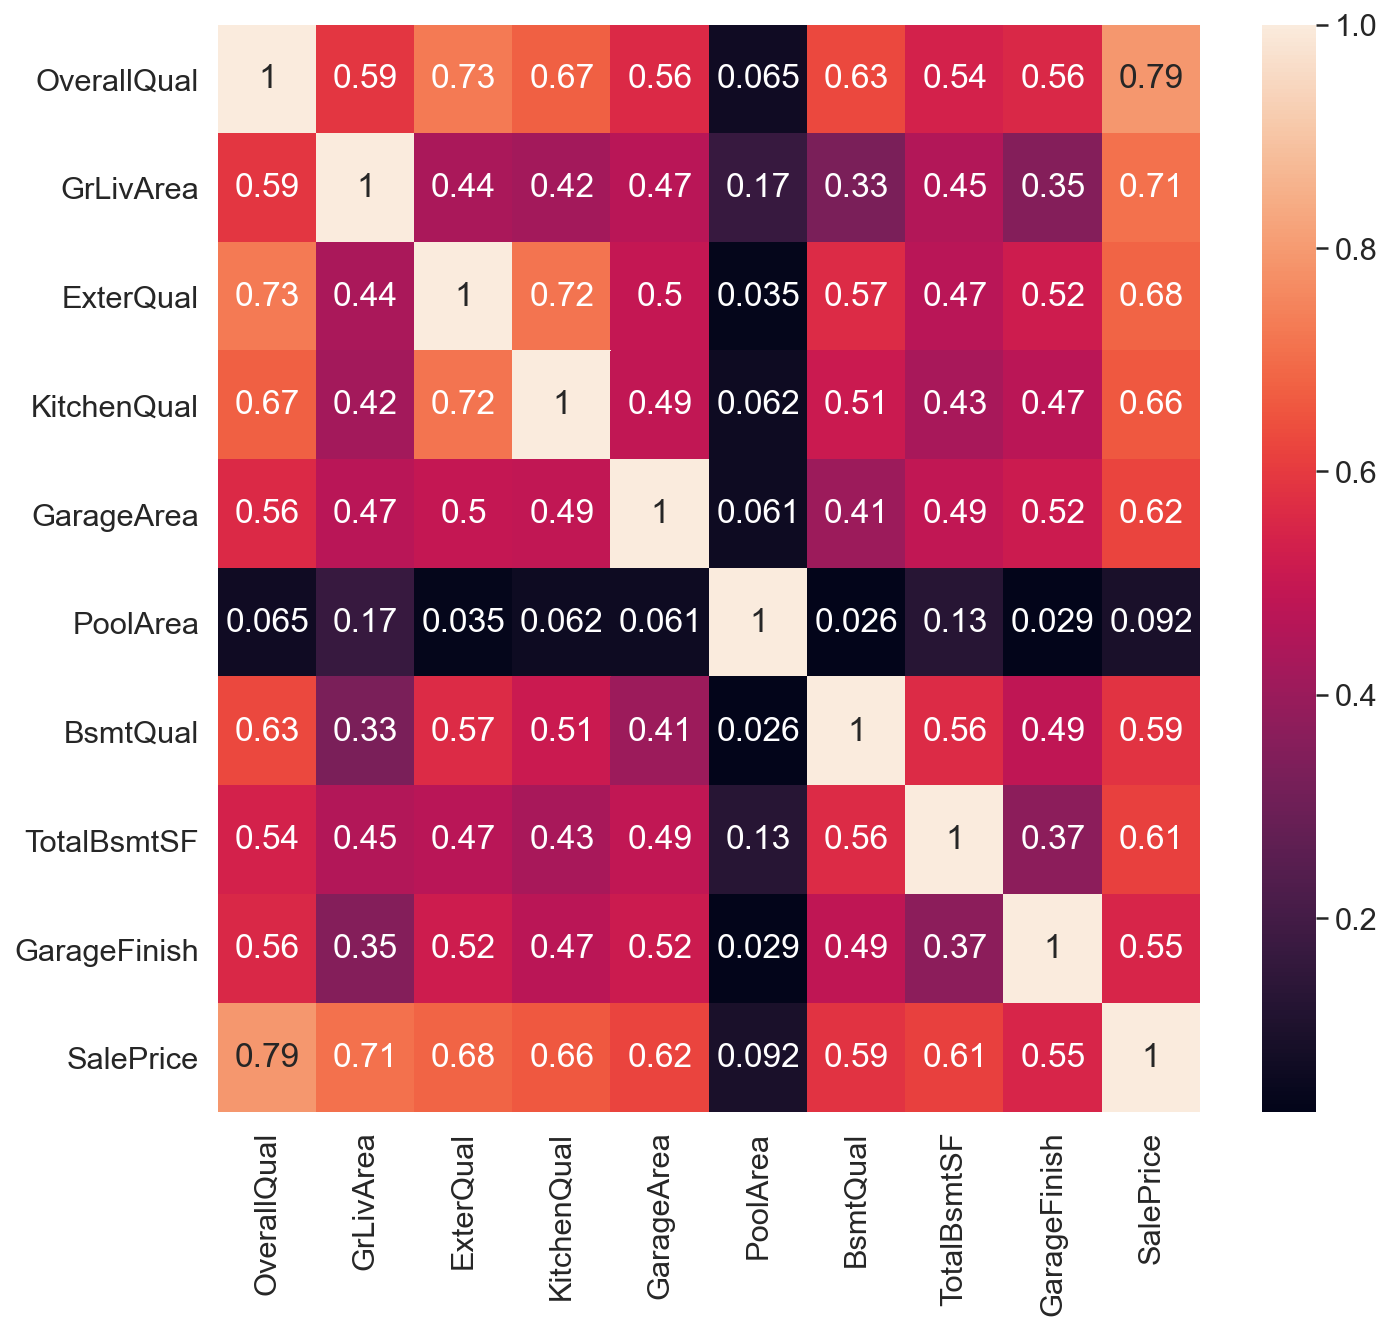

In [77]:
plt.figure(figsize=(11, 10))
rows, cols = (len(useful_columns), len(useful_columns))
pearson_corr = filtered_df.corr(method="pearson")
sns.heatmap(pearson_corr, annot=True)
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –≤—ã—à–µ: –µ—Å—Ç—å –ª–∏ –Ω–∞ –Ω–µ–º –ª–∏–Ω–µ–π–Ω–æ –∑–∞–≤–∏—Å–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ($|r_{XY}| > 0.9$)? 

**–û—Ç–≤–µ—Ç:** (–≤–ø–∏—à–∏—Ç–µ —Å–≤–æ–π –æ—Ç–≤–µ—Ç).

–£–¥–∞–ª–∏—Ç–µ, –µ—Å–ª–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è, –æ–¥–∏–Ω –∏–∑ –¥–≤—É—Ö —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —è—á–µ–π–∫–µ –Ω–∏–∂–µ.

In [79]:
filtered_df = filtered_df

–î–∞–≤–∞–π—Ç–µ –ø–æ–¥—Ä–æ–±–Ω–µ–µ –∏–∑—É—á–∏–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É. –ù–∞ –¥–∏–∞–≥–æ–Ω–∞–ª–µ $a_{ii} = d_i$ —ç—Ç–æ–π –º–∞—Ç—Ä–∏—Ü—ã –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è $i$-–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –ù–∞ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø–æ–∑–∏—Ü–∏—è—Ö $a_{ij}$ –±—É–¥—É—Ç —Ä–∞—Å–ø–æ–ª–∞–≥–∞—Ç—å—Å—è scatterplot –≤ –æ—Å—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ $i$ –ø–æ $x$ –∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ $j$ –ø–æ $y$. –î–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ –∏–∑ pandas ``pd.plotting.scatter_matrix``.

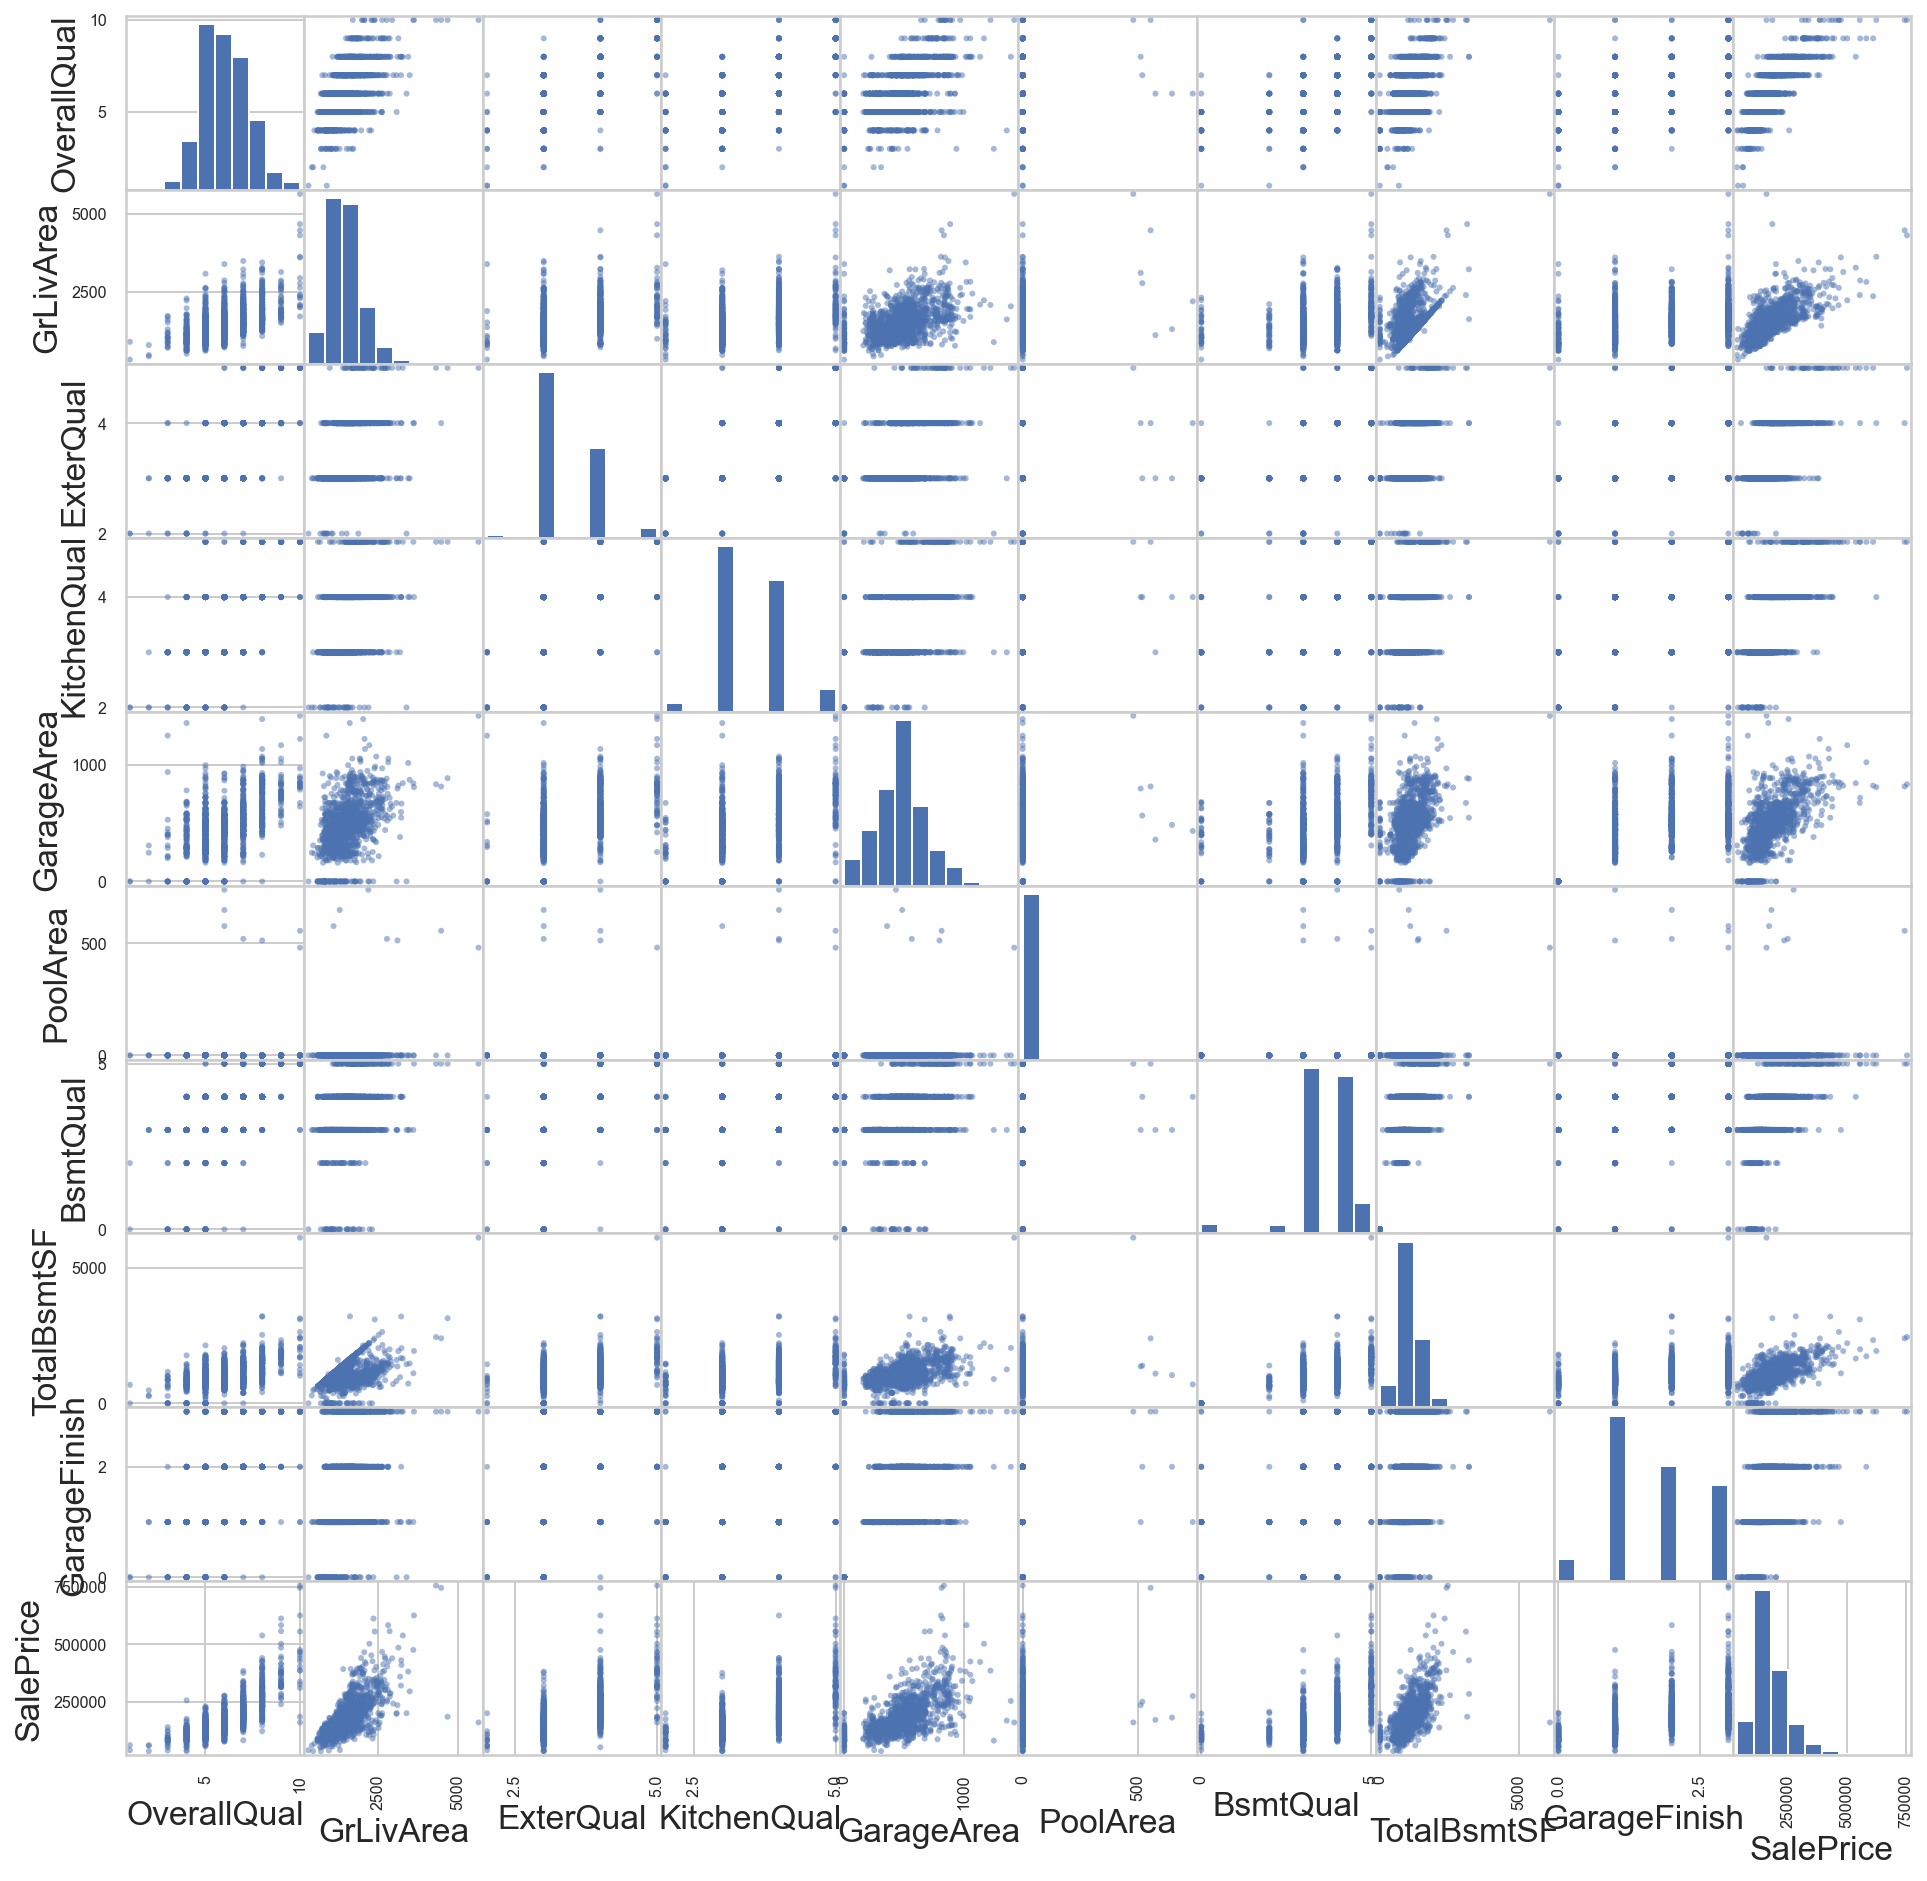

In [80]:
# YOUR CODE GOES HERE
pd.plotting.scatter_matrix(filtered_df, diagonal="hist", figsize=(16, 16))
plt.show()

### –ö–∞–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ª–∏–Ω–µ–π–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏

–ö–∞–∫ –º–æ–∂–Ω–æ –¥–æ–≥–∞–¥–∞—Ç—å—Å—è, –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏—à–µ—Ç –∑–∞–Ω–æ–≤–æ —Å–≤–æ–∏ –ª–∏–Ω–µ–π–Ω—ã–µ –º–æ–¥–µ–ª–∏. –î–ª—è –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫—É scikit learn, –¥–ª—è –∞–Ω–∞–ª–∏—Ç–∏–∫–∏ statsmodels. –° –ø–µ—Ä–≤–æ–π –≤—ã –ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç–µ—Å—å (–∏–ª–∏ —É–∂–µ –ø–æ–∑–Ω–∞–∫–æ–º–∏–ª–∏—Å—å) –Ω–∞ –∫—É—Ä—Å–µ –ø–æ ML, –º—ã –∂–µ —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ–º—Å—è –Ω–∞ –≤—Ç–æ—Ä–æ–π.

–ò—Ç–∞–∫, –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ statsmodels —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –∏, –∫–∞–∫ –Ω–∏ —Å—Ç—Ä–∞–Ω–Ω–æ, —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π. –û—Å–Ω–æ–≤–Ω—ã–º –ø–ª—é—Å–æ–º —è–≤–ª—è–µ—Ç—Å—è —Ç–æ, —á—Ç–æ –Ω–∞–º –Ω–µ –Ω—É–∂–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏–∏ –≤—Ä—É—á–Ω—É—é, –≤—Å–µ —Å–¥–µ–ª–∞–Ω–æ –∑–∞ –Ω–∞—Å (—ç—Ç–æ –Ω–µ –∑–Ω–∞—á–∏—Ç —á—Ç–æ –¥—É–º–∞—Ç—å –Ω–µ –Ω–∞–¥–æ!).

–ù–∞—á–Ω–µ–º —Å –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏: –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –µ–µ —Å–æ–∑–¥–∞—Ç—å –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –ª–∏—à—å –æ–¥–Ω–∞ —Å—Ç—Ä–æ–∫–∞.  –ö–∞–∫ –≤–∏–¥–Ω–æ –≤ —è—á–µ–π–∫–µ –Ω–∏–∂–µ –º—ã –∑–∞–¥–∞–µ–º —Ñ–æ—Ä–º—É–ª—É —Ç–æ–≥–æ, –∫–∞–∫—É—é –º–æ–¥–µ–ª—å –º—ã —Ö–æ—Ç–∏–º –ø–æ–ª—É—á–∏—Ç—å. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å ``SalePrice`` –ø–æ –≤–∑–≤–µ—à–µ–Ω–Ω–æ–π —Å—É–º–º–µ –∏–∑ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [81]:
formula = "SalePrice ~ " + " + ".join(useful_columns[:-1])

print(formula)

SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + GarageArea + PoolArea + BsmtQual + TotalBsmtSF + GarageFinish


–¢–µ–ø–µ—Ä—å —ç—Ç—É —Ñ–æ—Ä–º—É–ª—É –º—ã –ø—Ä–æ—Å—Ç–æ –ø–µ—Ä–µ–¥–∞–µ–º –≤ –º–æ–¥–µ–ª—å, –∞ —Ç–∞–∫ –∂–µ –ø–æ–¥–∞–µ–º –µ–π –¥–∞–Ω–Ω—ã–µ. –í —Ñ–æ—Ä–º—É–ª–µ –Ω–∞–ø–∏—Å–∞–Ω—ã –∏–º–µ–Ω–∞ –∫–æ–ª–æ–Ω–æ–∫ –∏–∑ ``filtered_df``. 

In [82]:
simple_model = smf.ols(formula, data=filtered_df)

fitted_simple_model = simple_model.fit()

print(fitted_simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     581.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:44:24   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1450   BIC:                         3.493e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.483e+05   6394.344    -23.185   

–ü–æ—Å–ª–µ —Ä–∞–±–æ—Ç—ã –∫–æ–¥–∞ –¥–æ–ª–∂–Ω–∞, –≤—ã—à–µ –¥–æ–ª–∂–Ω–∞ –ø–æ–ª—É—á–∏—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ —Ç–∞–∫–∞—è –∫–∞—Ä—Ç–∏–Ω–∫–∞:

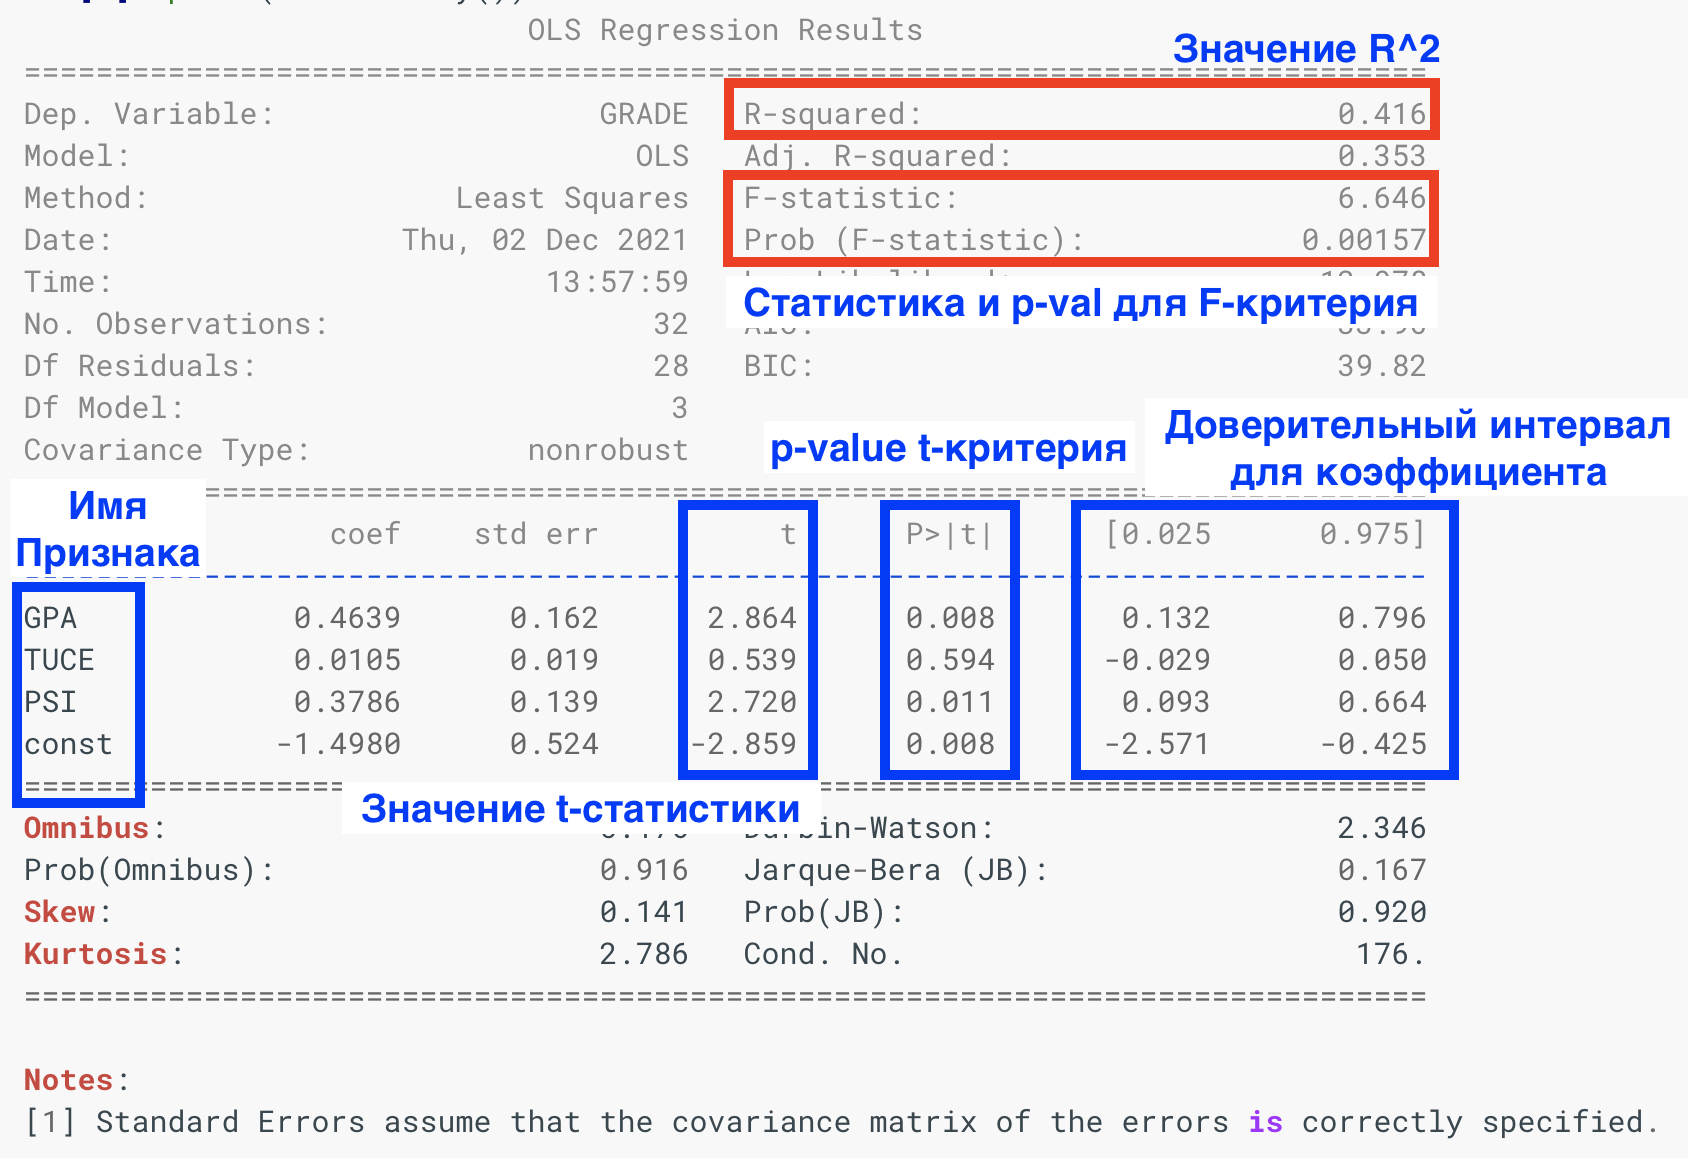


–í –ø—Ä–∏–º–µ—Ä–µ –Ω–∞–∑–≤–∞–Ω–∏–µ —Ñ–∏—á–µ–π –Ω–∞–º–µ—Ä–µ–Ω–Ω–æ –∏–∑–º–µ–Ω–µ–Ω—ã.

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Å–≤–µ—Ä—Ö—É —Ä–∞—Å–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º $R^2$. –î–∞–ª–µ–µ —á—É—Ç—å –Ω–∏–∂–µ —Ä–∞—Å–ø–æ–ª–∞–≥—é—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∏ p-value (—É—Ä–æ–≤–µ–Ω—å –¥–æ—Å—Ç–∏–≥–∞–µ–º–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏) –¥–ª—è F-–∫—Ä–∏—Ç–µ—Ä–∏—è. –ü—Ä–æ–≤–µ—Ä—è–µ—Ç—Å—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã.

–í –º–∏–Ω–∏-—Ç–∞–±–ª–∏—Ü–µ –µ—Å—Ç—å –ø—Ä–æ–≤–µ—Ä–∫–∞ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ –µ–≥–æ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –≤ –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é t-–∫—Ä–∏—Ç–µ—Ä–∏—è. –ü—Ä–æ–≤–µ—Ä—è–µ—Ç—Å—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å –±–µ–∑ —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –Ω–µ —Ö—É–∂–µ, —á–µ–º –º–æ–¥–µ–ª—å —Å —ç—Ç–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º. –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ p-value –Ω–∏–∑–∫–æ–µ, —Ç–æ, –≤–µ—Ä–æ—è—Ç–Ω–æ, –ø—Ä–∏–∑–Ω–∞–∫ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –≤–∞–∂–µ–Ω –¥–ª—è –º–æ–¥–µ–ª–∏. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º–æ–∂–Ω–æ –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.




### –ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –æ—à–∏–±–∫–∏

–û—Ü–µ–Ω–∫–∞, –ø–æ–ª—É—á–µ–Ω–Ω–∞—è —Å –ø–æ–º–æ—â—å—é –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –±—É–¥–µ—Ç —Å–ø—Ä–∞–≤–¥–ª–∏–≤–∞ –ª–∏—à—å –ø—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ —É—Å–ª–æ–≤–∏—è –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤. –î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–∞ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –ë—Ä–æ–π—à–∞ ‚Äî –ü–∞–≥–∞–Ω–∞. –ú—ã –Ω–µ –±—É–¥–µ–º –≤–¥–∞–≤–∞—Ç—å—Å—è –≤ –¥–µ—Ç–∞–ª–∏ –∏ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π –≤–∞–ª–∏–¥–Ω—ã–π –∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ. –ò—Ç–∞–∫, –∫—Ä–∏—Ç–µ—Ä–∏–π –ë—Ä–æ–π—à–∞ ‚Äî –ü–∞–≥–∞–Ω–∞ –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –ø—Ä–æ—Ç–∏–≤ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã, —Ç–æ –µ—Å—Ç—å –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏. –ï—Å–ª–∏ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è —Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ì–ï–¢–ï–†–û—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ. –ú—ã —ç—Ç–æ–≥–æ –Ω–µ —Ö–æ—Ç–∏–º.

–ö—Ä–∏—Ç–µ—Ä–∏–π —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ ``sms.diagnostic.het_breuschpagan``. –î–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—é –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ [–∑–¥–µ—Å—å](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html).

–û—Å—Ç–∞—Ç–∫–∏ –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ –∏–∑ –ø–æ–ª—è ``fitted_model.resid``, –∞ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏–∑ ``fitted_model.model.exog``.

–ù–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç p-value –¥–ª—è –º–Ω–æ–∂–∏—Ç–µ–ª—è –õ–∞–≥—Ä–∞–Ω–∂–∞.

–í —è—á–µ–π–∫–µ –Ω–∏–∂–µ –ø–æ–ª—É—á–∏—Ç–µ —É—Ä–æ–≤–µ–Ω—å –¥–æ—Å—Ç–∏–≥–∞–µ–º–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –¥–ª—è –∫—Ä–∏—Ç–µ—Ä–∏—è –ë—Ä–æ–π—à–∞ ‚Äî –ü–∞–≥–∞–Ω–∞.

In [84]:
p_val_het = sms.diagnostic.het_breuschpagan(fitted_simple_model.resid, fitted_simple_model.model.exog)[1]

print(f"p-value simple: {p_val_het}")
print(p_val_het < 0.05)

p-value simple: 5.431361130995175e-95
True


–û—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è –ª–∏ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤? –ß—Ç–æ —ç—Ç–æ –æ–∑–Ω–æ—á–∞–µ—Ç?

**–û—Ç–≤–µ—Ç:**

–í —Å–ª—É—á–∞—è—Ö, –∫–æ–≥–¥–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ–º –æ—Ü–µ–Ω–∫–∞ –ø–æ-–ø—Ä–µ–∂–Ω–µ–º—É –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ–π, –æ–¥–Ω–∞–∫–æ —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—É—é –ø–æ–ø—Ä–∞–≤–∫—É, –Ω–∞ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é. –ü–æ—ç—Ç–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—è F-–∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –∏ t-–∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Å—Ç–æ–∏—Ç –ø–µ—Ä–µ—Å–º–æ—Ç—Ä–µ—Ç—å. –î–ª—è —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞–µ–≤ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ–ø—Ä–∞–≤–æ–∫, –æ–¥–Ω–æ –∏–∑ —Å–µ–º–µ–π—Å—Ç–≤ —Ç–∞–∫–∏—Ö –ø–æ–ø—Ä–∞–≤–æ–∫ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –ø–æ–ø—Ä–∞–≤–∫–∏ –£–∞–π—Ç–∞ –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å. –ù–∏–∂–µ –º—ã –ø–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω—É –∏–∑ –ø–æ–ø—Ä–∞–≤–æ–∫.

–î–ª—è —ç—Ç–æ–≥–æ, –≤ —è—á–µ–π–∫–µ –Ω–∏–∂–µ, –æ–±—É—á–∏—Ç–µ –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å, –Ω–æ –Ω–∞ —ç—Ç–æ—Ç —Ä–∞–∑ –ø–µ—Ä–µ–¥–∞–π—Ç–µ –≤ –º–µ—Ç–æ–¥ ``.fit`` –∞—Ä–≥—É–º–µ–Ω—Ç ``cov_type="HC1"``.

–ü–æ–ª—É—á–∏—Ç–µ summary –¥–ª—è —Ç–∞–∫–æ–π –º–æ–¥–µ–ª–∏.

In [85]:
# YOUR CODE GOES HERE
simple_model_white = smf.ols(formula, data=filtered_df)

fitted_simple_model_white = simple_model.fit(cov_type="HC1")

print(fitted_simple_model_white.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     266.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.44e-300
Time:                        18:45:21   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1450   BIC:                         3.493e+04
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.483e+05   9507.281    -15.594   

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –ö–∞–∫ –∏–∑–º–µ–Ω–∏–ª–∏—Å—å p-value –¥–ª—è t-–∫—Ä–∏—Ç–µ—Ä–∏–µ–≤? –ö–∞–∫ –∏–∑–º–µ–Ω–∏–ª—Å—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $R^2$?

**–û—Ç–≤–µ—Ç:**

–¢–µ–ø–µ—Ä—å –º—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å —Ç–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ –≤–∞–∂–µ–Ω —Ç–æ—Ç –∏–ª–∏ –∏–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫. –î–∞–≤–∞–π—Ç–µ –æ—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –∏ –æ—Å—Ç–∞–≤–∏–º –≤ –Ω–µ–º —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha = 0.05$. (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ t-–∫—Ä–∏—Ç–µ—Ä–∏–π).



In [86]:
features_to_filter = ["PoolArea"]

filtered_columns = useful_columns

for f_t_f in features_to_filter:
    idx_to_filter = useful_columns.index(f_t_f)
    filtered_columns.pop(idx_to_filter)

In [87]:
filtered_df_filtered_columns = filtered_df[filtered_columns]

In [88]:
filtered_columns

['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageArea',
 'BsmtQual',
 'TotalBsmtSF',
 'GarageFinish',
 'SalePrice']

–ö–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –Ω–µ –∑–Ω–∞—á–∏–º—ã –∏ –ø–æ—á–µ–º—É?

**–û—Ç–≤–µ—Ç:**

–¢–µ–ø–µ—Ä—å —Å–Ω–æ–≤–∞ –æ–±—É—á–∏–º –Ω–æ–≤—É—é –º–æ–¥–µ–ª—å —Ç–æ–ª—å–∫–æ –Ω–∞ –∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –∏ –ø–æ–ª—É—á–∏–º summary. –ù–µ –∑–∞–±—É–¥—å—Ç–µ –ø—Ä–æ –ø–æ–ø—Ä–∞–≤–∫—É –£–∞–π—Ç–∞!

In [89]:
filtered_formula = "SalePrice ~ " + " + ".join(filtered_columns[:-1])

simple_model_filtered = smf.ols(filtered_formula, data=filtered_df_filtered_columns)

fitted_simple_model_filtered = simple_model_filtered.fit(cov_type="HC1")

print(fitted_simple_model_filtered.summary())
print(filtered_formula)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     300.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.12e-301
Time:                        18:46:32   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1451   BIC:                         3.492e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -1.48e+05   9707.685    -15.247   

–ö–∞–∫ –∏–∑–º–µ–Ω–∏–ª—Å—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $R^2$? –í—Å–µ–≥–¥–∞ –ª–∏ –±–û–ª—å—à–∏–π $R^2$ –≥–æ–≤–æ—Ä–∏—Ç –æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏? –†–∞—Å—Å–∫–∞–∂–∏—Ç–µ –æ —Å–≤–æ–∏—Ö —Ä–∞—Å—Å—É–∂–¥–µ–Ω–∏—è—Ö!

**–û—Ç–≤–µ—Ç:**

### –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

–û–±—Ä–∞—Ç–∏–º —Å–≤–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é. –ù–∏–¥–µ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ ``SalePrice``. –ê —Ç–∞–∫ –∂–µ –¥–ª—è –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –æ—Ç ``SalePrice``. –°–¥–µ–ª–∞–π—Ç–µ —ç—Ç–æ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –∫–∞—Ä—Ç–∏–Ω–∫–∞—Ö. –ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å subplot.

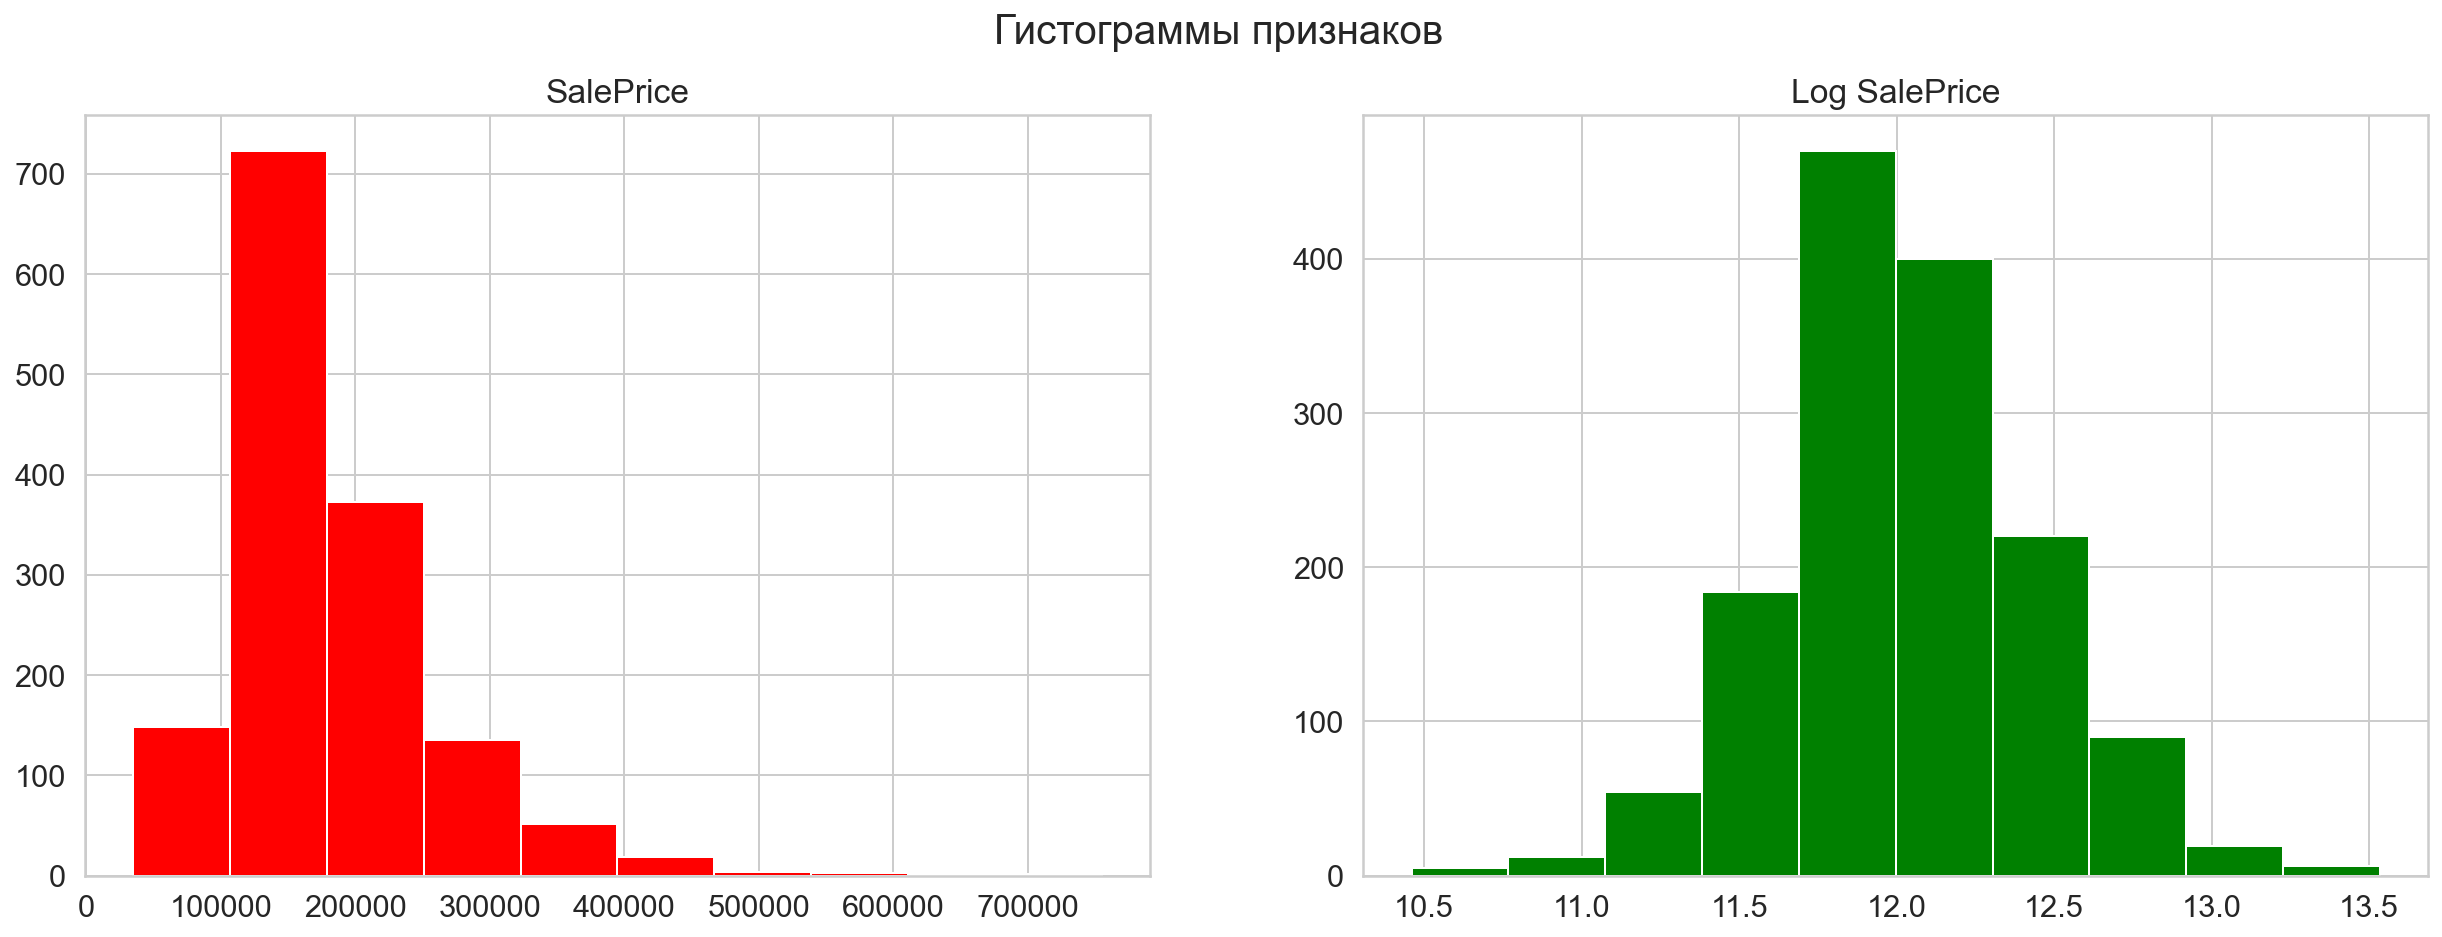

In [90]:
# YOUR CODE GOES HERE

fig, ax = plt.subplots(1, 2, figsize=(21,7))
fig.suptitle("–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")

ax[0].set_title("SalePrice")
ax[0].hist(filtered_df["SalePrice"], color="red")

ax[1].set_title("Log SalePrice")
ax[1].hist(np.log(filtered_df["SalePrice"]), color="green")

plt.show()

–ö–∞–∫–æ–π –∏–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤—ã–≥–ª—è–¥–∏—Ç –±–æ–ª–µ–µ "–ì–∞—É—Å—Å–æ–≤—Å–∫–∏–º"?

**–û—Ç–≤–µ—Ç:**

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ —Å–Ω–æ–≤–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Ç –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. –ù–∞—á–µ—Ä—Ç–∏–º qqplot –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –æ—Å—Ç–∞—Ç–∫–æ–≤.

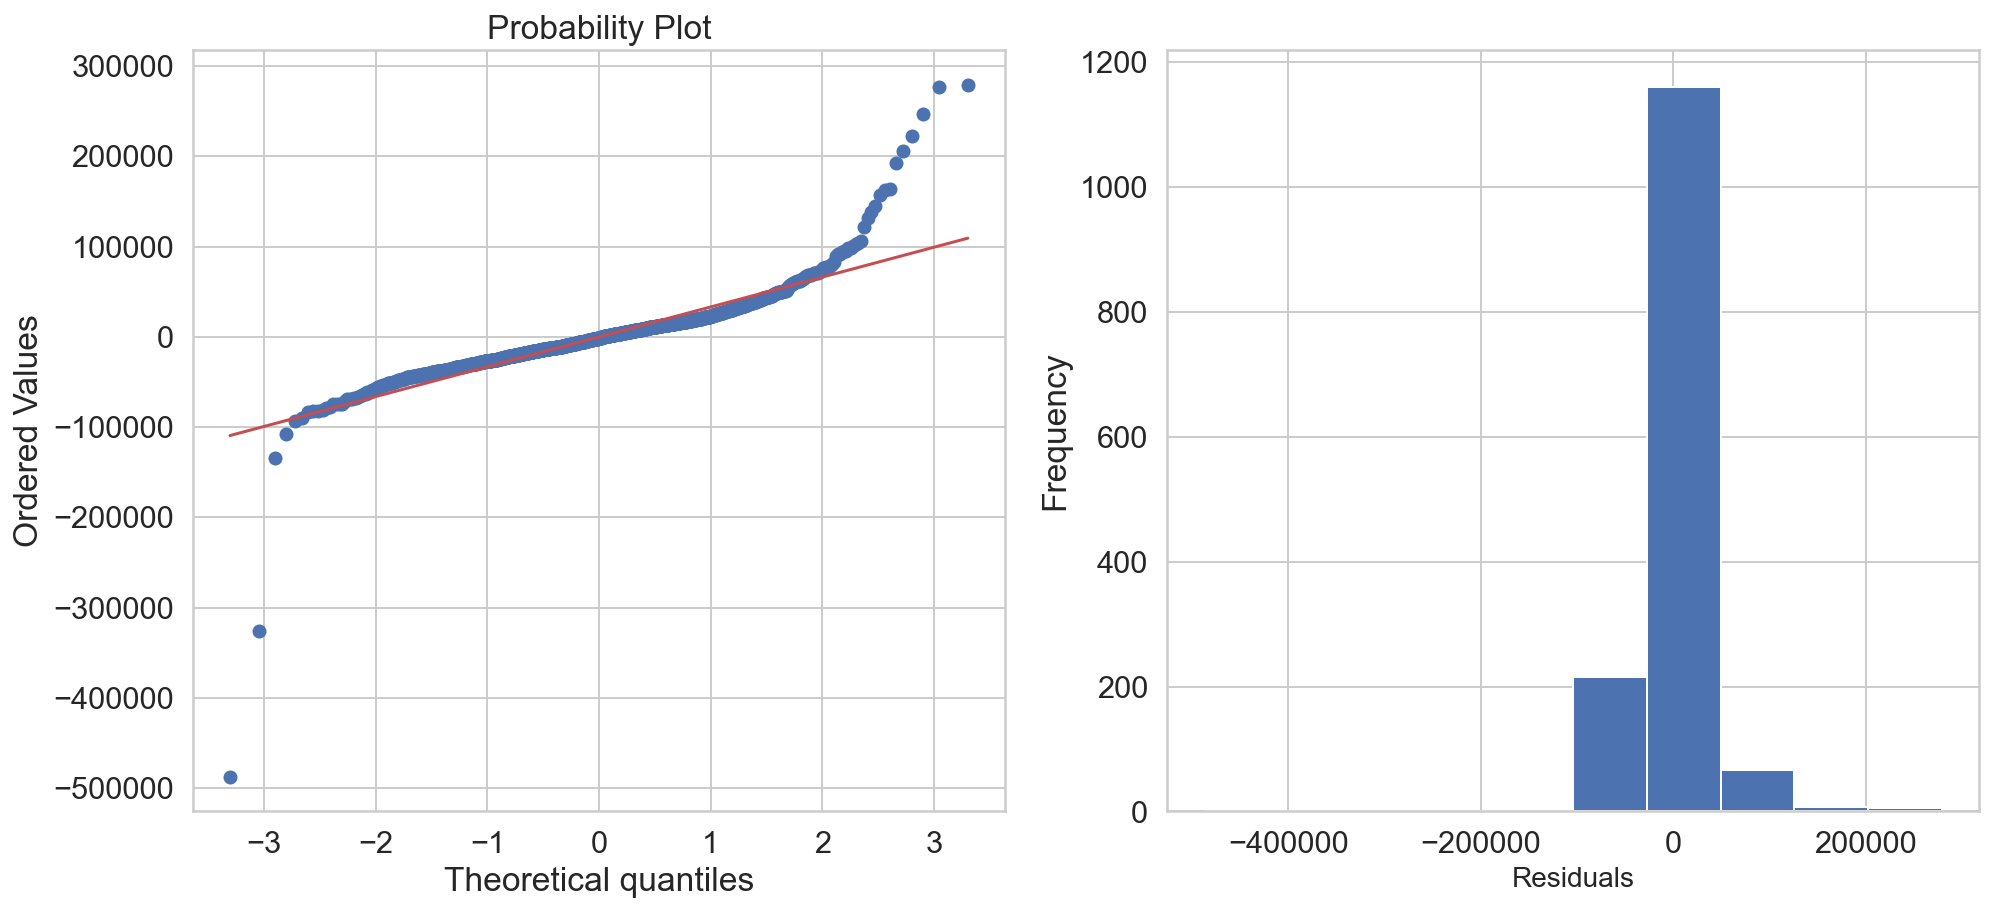

In [92]:
import scipy

plt.figure(figsize=(16,7))
plt.subplot(121)
scipy.stats.probplot(fitted_simple_model_filtered.resid, dist="norm", plot=plt)
plt.subplot(122)
fitted_simple_model_filtered.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

–ö–∞–∫ –≤—ã —Å—á–∏—Ç–∞–µ—Ç–µ, –º–æ–∂–Ω–æ –ª–∏ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ?

**–û—Ç–≤–µ—Ç:**

–î–∞–≤–∞–π—Ç–µ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –Ω–µ SalePrice, –∞ –µ–µ –ª–æ–≥–∞—Ä–∏—Ñ–º. –î–ª—è —ç—Ç–æ–≥–æ —Å–Ω–æ–≤–∞ –æ–±–Ω–æ–≤–∏–º —Ñ–æ—Ä–º—É–ª—É –¥–ª—è –º–æ–¥–µ–ª–∏. –ü—Ä–µ–ª–µ—Å—Ç—å —Ñ–æ—Ä–º—É–ª –≤ —Ç–æ–º, —á—Ç–æ –≤ –Ω–∏—Ö –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–ø–µ—Ä–∞—Ü–∏–∏ –∏–∑ numpy. –ù–∞–ø—Ä–∏–º–µ—Ä –º–æ–∂–Ω–æ –∏—Å–∫–∞—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–µ –æ—Ç ``PoolArea``, –∞ –æ—Ç –µ–µ –∫–≤–∞–¥—Ä–∞—Ç–∞, —Ç–æ –µ—Å—Ç—å ``np.power(PoolArea, 2)``. –î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–æ—Å—Ç–æ –¥–æ–±–∞–≤–∏—Ç—å –≤ —Ñ–æ—Ä–º—É–ª—É ..." + np.power(PoolArea, 2)" –∏ –≤—Å–µ –∑–∞—Ä–∞–±–æ—Ç–∞–µ—Ç!

–í —è—á–µ–π–∫–µ –Ω–∏–∂–µ –æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º SalePrice. –ü–æ–ª—É—á–∏—Ç–µ summary —ç—Ç–æ–π –º–æ–¥–µ–ª–∏.

In [93]:
log_formula = "np.log(SalePrice) ~ " + " + ".join(filtered_columns[:-1])

log_model = smf.ols(log_formula, data=filtered_df)

fitted_log_model = log_model.fit(cov_type="HC1")

print(fitted_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     599.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:47:27   Log-Likelihood:                 499.69
No. Observations:                1460   AIC:                            -981.4
Df Residuals:                    1451   BIC:                            -933.8
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.4070      0.035    298.718   

–ö–∞–∫ –∏–∑–º–µ–Ω–∏–ª—Å—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç R^2? –ú–æ–¥–µ–ª—å –ª—É—á—à–µ —Å—Ç–∞–ª–∞ –ø–æ–Ω–∏–º–∞—Ç—å –¥–∞–Ω–Ω—ã–µ?

**–û—Ç–≤–µ—Ç:**

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏, –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ —Ç–µ–º, —á—Ç–æ –≤—Å—Ç—Ä–µ—Ç–∏–ª–∏—Å—å –Ω–∞–º –Ω–∞ –¥–≤–µ —è—á–µ–π–∫–∏ –≤—ã—à–µ (qqplot –∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –æ—Å—Ç–∞—Ç–∫–æ–≤). –ù–æ –Ω–∞ —ç—Ç–æ—Ç —Ä–∞–∑ –¥–ª—è –º–æ–¥–µ–ª–∏, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â–∏–µ–π –ª–æ–≥–∞—Ä–∏—Ñ–º. 

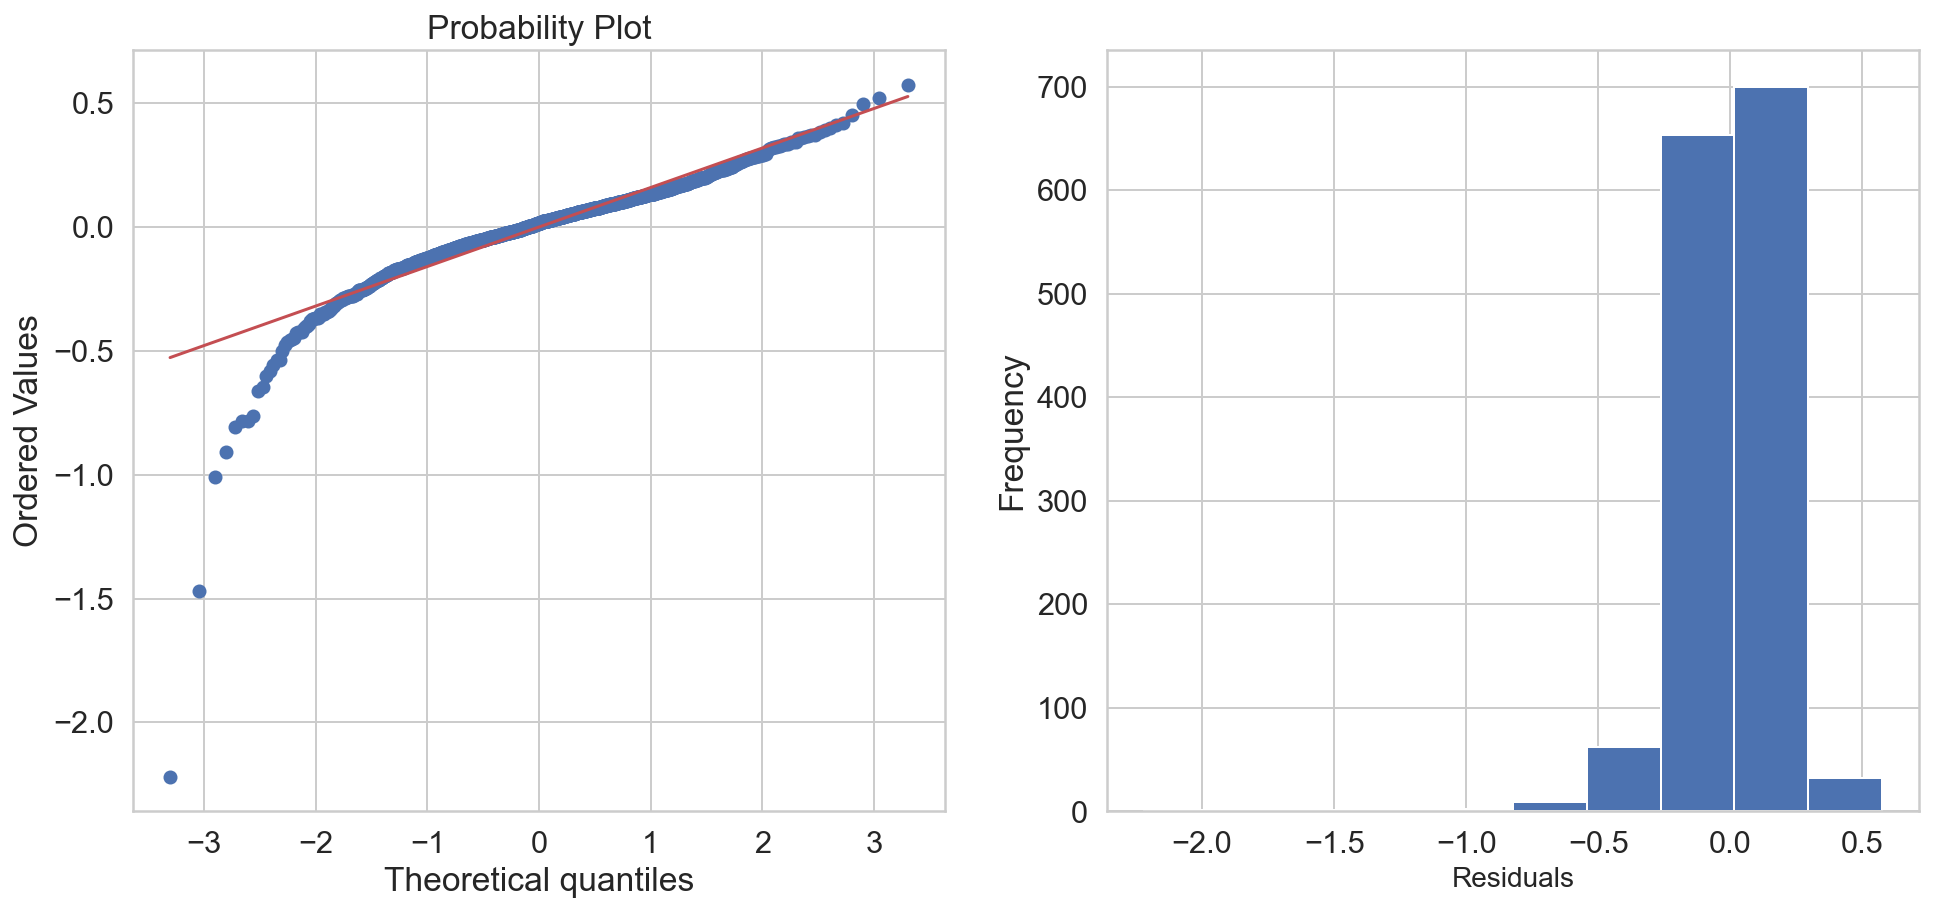

In [94]:
import scipy

plt.figure(figsize=(16,7))
plt.subplot(121)
scipy.stats.probplot(fitted_log_model.resid, dist="norm", plot=plt)
plt.subplot(122)
fitted_log_model.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.show()

–ö–∞–∫ –≤—ã —Å—á–∏—Ç–∞–µ—Ç–µ, —Å—Ç–æ–∏—Ç –ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º –æ—Ç —Ü–µ–Ω—ã? –í –∫–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö —ç—Ç–æ –ø–æ–ª–µ–∑–Ω–æ?

**–û—Ç–≤–µ—Ç:**